In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
import warnings

Importing the CSV data as pandas Dataframe

In [2]:
df= pd.read_csv(r"C:\Users\pulki\mlproject2\notebook\data\data.csv")

Showing top 5 records

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(columns= ['customerID'], inplace= True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Preparing X and y variables

In [5]:
X= df.drop(columns= 'MonthlyCharges', axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [6]:
y= df['MonthlyCharges']
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [7]:
print("Categories in 'gender':", df['gender'].unique())

print("Categories in 'SeniorCitizen':", df['SeniorCitizen'].unique())

print("Categories in 'Partner':", df['Partner'].unique())

print("Categories in 'Dependents':", df['Dependents'].unique())

print("Categories in 'InternetService':", df['InternetService'].unique())

print("Categories in 'Contract':", df['Contract'].unique())

print("Categories in 'PaperlessBilling':", df['PaperlessBilling'].unique())

print("Categories in 'PaymentMethod':", df['PaymentMethod'].unique())

print("Categories in 'Churn' (Target):", df['Churn'].unique())


Categories in 'gender': ['Female' 'Male']
Categories in 'SeniorCitizen': [0 1]
Categories in 'Partner': ['Yes' 'No']
Categories in 'Dependents': ['No' 'Yes']
Categories in 'InternetService': ['DSL' 'Fiber optic' 'No']
Categories in 'Contract': ['Month-to-month' 'One year' 'Two year']
Categories in 'PaperlessBilling': ['Yes' 'No']
Categories in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Categories in 'Churn' (Target): ['No' 'Yes']


In [8]:
X.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL       

In [9]:
# Create Column Transformer with 3 types of transformers
num_features= X.select_dtypes(exclude= 'object').columns
cat_features= X.select_dtypes(include= 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

OH_transformer= OneHotEncoder()
numeric_transformer= StandardScaler()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", OH_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

Checking the shape of X and y

In [11]:
X.shape

(7043, 6576)

In [12]:
y.shape

(7043,)

Training the X and y model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.2, random_state= 12)
X_train.shape, y_train.shape

((1408, 6576), (1408,))

In [14]:
def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mse)
    r2_square= r2_score(true, predicted)

    return mae, rmse, r2_square

Training and Testing Model with different models

In [15]:
models = {
    "Linear Regression": LinearRegression(),        
    "Ridge Regression": Ridge(),                    
    "Random Forest Regressor": RandomForestRegressor(),  
    "Gradient Boosting Regressor": GradientBoostingRegressor() 
}

model_list= []
r2_list= []

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0131
- Mean Absolute Error: 0.0021
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8183
- Mean Absolute Error: 1.4416
- R2 Score: 0.9964


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 0.4962
- Mean Absolute Error: 0.3809
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0397
- Mean Absolute Error: 0.7909
- R2 Score: 0.9988


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8429
- Mean Absolute Error: 0.5802
- R2 Score: 0.9992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2919
- Mean Absolute Error: 1.5457
- R2 Score: 0.9942


Gradient Boosting Regressor
Model performance for Training set
- Root Mean Squared Error: 1.0201
- Mean Absolute Error: 0.8050
- R2 Sc

# Results

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['model_list', 'R2_Score']).sort_values(by= ['R2_Score'], ascending= False)

,model_list,R2_Score
1,Ridge Regression,0.998810
3,Gradient Boosting Regressor,0.998402
0,Linear Regression,0.996361
2,Random Forest Regressor,0.994218


# Linear Regression

In [17]:
lin_model= LinearRegression(fit_intercept= True)
lin_model= lin_model.fit(X_train, y_train)
y_pred= lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 99.64


# Plot y_test and y_pred

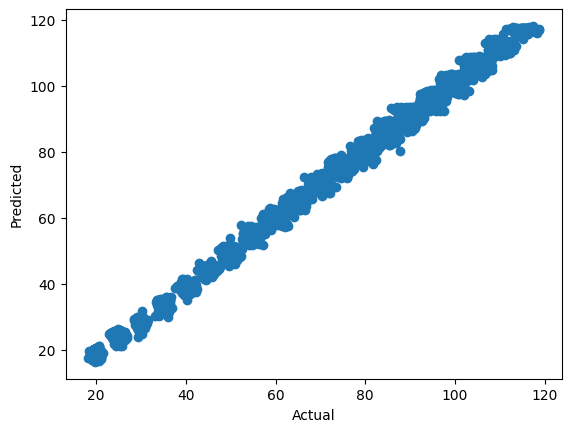

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

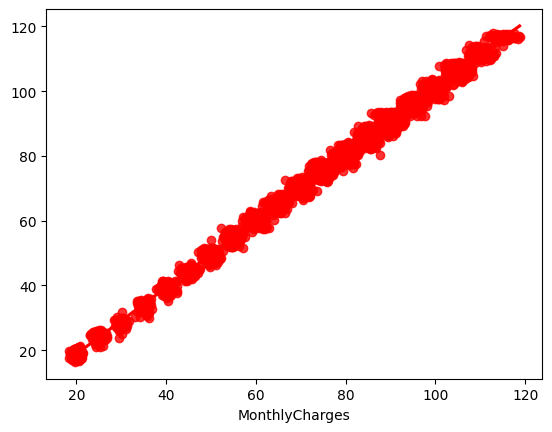

In [19]:
sns.regplot(x= y_test, y= y_pred, ci= None, color= 'red')
plt.show()

Difference between Actual and Predicted Values

In [20]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6235,40.05,38.386102,1.663898
3980,105.70,107.945651,-2.245651
6548,54.35,54.597545,-0.247545
3954,94.80,96.006120,-1.206120
5328,66.05,64.182596,1.867404
...,...,...,...
5617,20.75,19.322453,1.427547
6100,99.05,102.421331,-3.371331
3620,50.00,51.483607,-1.483607
4619,79.65,78.296553,1.353447
